# Electric car charging points in Germany

In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_excel('data/Ladesaeulenkarte_Datenbankauszug30.xlsx', skiprows=5)

In [11]:
data.head()

,Betreiber,Adresse,Postleitzahl Ort,Bundesland,Längengrad [DG],Breitengrad [DG],Inbetriebnahmedatum,Anschlussleistung [kW],Art der Ladeeinrichtung,Anzahl Ladepunkte,...,Public Key1,Steckertypen2,P2 [kW],Public Key2,Steckertypen3,P3 [kW],Public Key3,Steckertypen4,P4 [kW],Public Key4
0,MVV Energie AG,Luisenring 49,68159 Mannheim,Baden-Württemberg,8.46764,49.4947,2019-08-30,44,Normalladeeinrichtung,2,...,NaN,AC Steckdose Typ 2,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MVV Energie AG,L 13 15,68161 Mannheim,Baden-Württemberg,8.46887,49.4808,2018-12-20,44,Normalladeeinrichtung,2,...,NaN,AC Steckdose Typ 2,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MVV Energie AG,Q6,68161 Mannheim,Baden-Württemberg,8.47209,49.4864,2016-11-01,22,Normalladeeinrichtung,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MVV Energie AG,Q6,68161 Mannheim,Baden-Württemberg,8.47209,49.4864,2016-11-01,22,Normalladeeinrichtung,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MVV Energie AG,Q6,68161 Mannheim,Baden-Württemberg,8.47209,49.4864,2016-11-01,11,Normalladeeinrichtung,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data.columns = data.columns.str.replace(' ', '')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13006 entries, 0 to 13005
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Betreiber              13006 non-null  object        
 1   Adresse                13006 non-null  object        
 2   PostleitzahlOrt        13006 non-null  object        
 3   Bundesland             13006 non-null  object        
 4   Längengrad[DG]         13006 non-null  object        
 5   Breitengrad[DG]        13006 non-null  object        
 6   Inbetriebnahmedatum    13006 non-null  datetime64[ns]
 7   Anschlussleistung[kW]  13006 non-null  object        
 8   ArtderLadeeinrichtung  13006 non-null  object        
 9   AnzahlLadepunkte       13006 non-null  int64         
 10  Steckertypen1          13006 non-null  object        
 11  P1[kW]                 13006 non-null  float64       
 12  PublicKey1             448 non-null    object        
 13  S

In [15]:
data.nunique()

Betreiber                 1408
Adresse                  10585
PostleitzahlOrt           4938
Bundesland                  16
Längengrad[DG]           11470
Breitengrad[DG]          11460
Inbetriebnahmedatum       1912
Anschlussleistung[kW]      109
ArtderLadeeinrichtung        2
AnzahlLadepunkte             4
Steckertypen1               31
P1[kW]                      47
PublicKey1                 447
Steckertypen2               24
P2[kW]                      39
PublicKey2                 384
Steckertypen3               12
P3[kW]                      25
PublicKey3                   9
Steckertypen4               11
P4[kW]                      16
PublicKey4                   8
dtype: int64

In [47]:
bundesland_summary = pd.pivot_table(data = data, index = 'Bundesland', values = 'AnzahlLadepunkte', aggfunc = ['count', 'sum'])
bundesland_summary.reset_index(inplace=True)
bundesland_summary.columns = ['Bundesland', 'counts', 'sum']

In [56]:
bundesland_summary.sort_values(by='counts', ascending=False)

,Bundesland,counts,sum
1,Bayern,3002,5995
9,Nordrhein-Westfalen,2285,4442
0,Baden-Württemberg,1863,3569
8,Niedersachsen,1262,2372
6,Hessen,802,1577
10,Rheinland-Pfalz,565,1094
14,Schleswig-Holstein,536,1043
5,Hamburg,521,1054
2,Berlin,516,938
12,Sachsen,486,1058


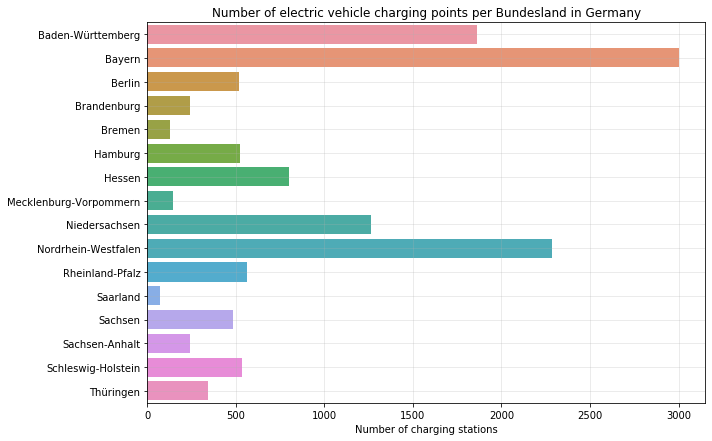

In [78]:
fig, ax = plt.subplots(figsize = (10,7))
sns.barplot(data = bundesland_summary, x = 'counts', y = 'Bundesland', ax=ax)
ax.set_xlabel('Number of charging stations')
ax.set_ylabel('')
ax.set_title('Number of electric vehicle charging points per Bundesland in Germany')
ax.grid(alpha=0.3);